In [2]:
%load_ext google.datalab.kernel

The google.datalab.kernel extension is already loaded. To reload it, use:
  %reload_ext google.datalab.kernel


In [3]:
!pip install -r ../src/xgb_training/requirements.txt

In [5]:
import sys
import math

import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np
sys.path.insert(1, '../src/xgb_training')
from trainer import model

## Download the booster from GCS and save to local FS

In [6]:
%storage read -o gs://gcp-cert-demo-2/model/model.bst -v booster

In [7]:
filename = "model.bst"
filehand = open(filename, "wb")
filehand.write(booster)
filehand.close()

## Get training and validation data

In [8]:
x_train, y_train, x_val, y_val, cols = model.process_data(test_partition_name="validate")

## Fit training data

In [9]:
xg_reg = model.fit_regressor(filename, x_train, y_train)

## RMSE

In [10]:
print("RMSE: %.2f"
      % math.sqrt(np.mean((model.predict_regressor(xg_reg, x_val) - y_val) ** 2)))

RMSE: 372016.02


## R-squared

In [11]:
r2 = model.r2(xg_reg, x_val, y_val)
print("R^2: %.2f" % (r2))

R^2: 0.83%


## Plot feature importance

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


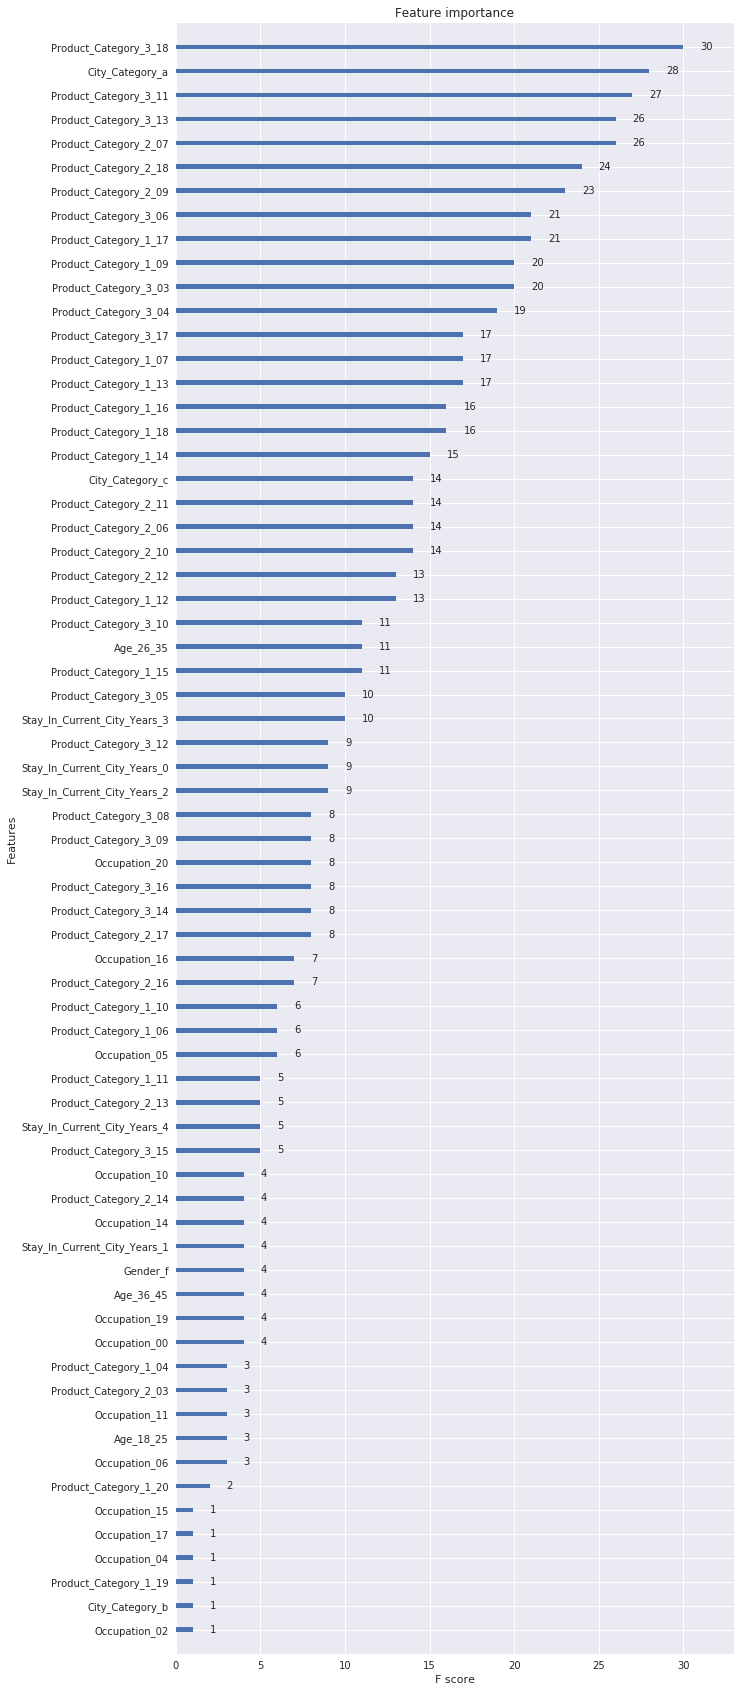

In [12]:
ax = xgb.plot_importance(xg_reg)
fig = ax.figure
fig.set_size_inches(10, 30)

In [13]:
model.delete_model(filename)